In [9]:
#access token vfrom NOAA
Token = 'PiAOWZKyvoDsXuUQNPlniGhxqexmLpVD'

#Long Beach Airport station
station_id = 'GHCND:USW00094789'

#For web requests
import requests

#To save the data
import pandas as pd

#convert the response to json
import json

#Numerical manipulation
import numpy as np

#parse the datetimes 
from datetime import datetime

#For ploting graphs and charts
import matplotlib.pyplot as plt 

import math

In [32]:
df = pd.read_csv("vgsales.csv")
df.describe()
df
df.values
df.shape


(16598, 11)

In [14]:
#initialize lists to store data
t_date = []
temperatures = []

#from year 2015-2019 ...
for year in range(2015, 2019):
    year = str(year)
    
    #make the api call
    req = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00094789&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    data = json.loads(req.text)
    #get all items in the response which are average temperature readings
    average_temps = [item for item in data['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    t_date += [item['date'] for item in average_temps]
    #get the actual average temperature from all average temperature readings
    temperatures += [item['value'] for item in average_temps]

#initialize dataframe
df_weather = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_weather['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in t_date]
df_weather['temp_avg'] = [float(v)/10.0*1.8 + 32 for v in temperatures]

df_weather


,date,temp_avg
0,2015-01-01,32.54
1,2015-01-02,39.38
2,2015-01-03,36.50
3,2015-01-04,47.30
4,2015-01-05,42.98
...,...,...
1456,2018-12-27,39.92
1457,2018-12-28,46.40
1458,2018-12-29,50.36
1459,2018-12-30,37.40


In [37]:
# pyplot.plot(df_weather['date'], df_weather['temp_avg'])
# pyplot.show()

In [16]:
#This function takes 5 args 
#target_year = x, 
#small_year = x1, 
#big_year = x2, 
#small_temp = y1, 
#big_temp = y2
# Returns the target year y
def linear_interpolation(x, x1, x2, y1, y2):
    y = 0
    y = y1 + (((y2 - y1)/(x2 - x1)) * (x - x1))
    return y

#This function takes 1 arg to check for the year, or month
def date_equality_checker(index):
    if (((x[index].year)!=(x[index - 1].year)) and ((x[index].year)!=(x[index - 1].year))):
        return 1
    elif (((x[index].month)!=(x[index - 1].month)) and ((x[index].month)!=(x[index - 1].month))):
        return 2
    else:
        return 3

In [41]:
# Set the dataFrame into X and Y axis
y = df_weather['temp_avg']
x = df_weather['date']

x.head()

AttributeError: 'Timestamp' object has no attribute 'head'

In [18]:
## To set the some y values to NaN
# for index in range(0, y.size, 3):
#     y[index] = np.nan
y.head(y.size)


In [21]:
print("DATE               ||  AVG_TEMP")
print("""============================
""")
for index in range(1, y.size):
    if np.isnan(y[index]):
        if index == 0:
            Print("index is 0") #Edge Case that needs to be handle (Extrapolate)
        elif index == y.size:
            print ("It is the last index") #Edge Case that needs to be handle (Extrapolate)
        else:
            date_equality = date_equality_checker(index) #Interxpolate
            if date_equality == 3:
                print(f"{x[index]} - {round(linear_interpolation(x=x[index].day, x1=x[index-1].day, x2=x[index+1].day, y1=y[index-1], y2=y[index+1]),2)}")
            elif date_equality == 2:
                print(f"{x[index]} - {round(linear_interpolation(x=x[index].month, x1=x[index-1].month, x2=x[index+1].month, y1=y[index-1], y2=y[index+1]),2)}")
            else:
                print(f"{x[index]} - {round(linear_interpolation(x=x[index].year, x1=x[index-1].year, x2=x[index+1].year, y1=y[index-1], y2=y[index+1]),2)}")
            
            
            

DATE               ||  AVG_TEMP



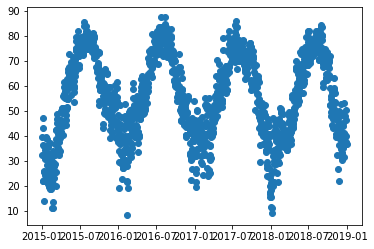

In [22]:
pyplot.scatter(df_weather['date'], df_weather['temp_avg'])
pyplot.show()

In [57]:
# Build the model here

y = df_weather['temp_avg']
x = df_weather['date']

m = 0
c = 0

#learning rate
L = 0.0001 
epochs = 1000

num_X = float(len(x))

for i in range(len(x)):
    pred_Y = m * x[i].year + c
    Dm = (-2/num_X) *  x[i].year * (y[i] - pred_Y)
    Dc = (-2/num_X) * y[i] - pred_Y
    m = m - L * Dm
    c = c - L * Dc
#     print(f"{num_X} - {x[i].year} - {y[i]} - {pred_Y}")
    
print(m, c)

0.015298235547459054 8.146392144384526


In [58]:
# make prediction

pred_Y = m * x + c

# pyplot.scatter(x, y)
# pyplot.scatter(x, pred_Y)
# pyplot.show()

TypeError: cannot perform __rmul__ with this index type: DatetimeArray